vae\diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
100%|██████████| 50/50 [00:02<00:00, 19.31it/s]


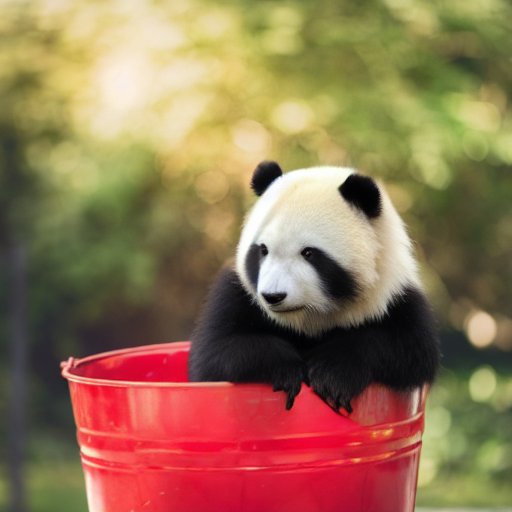

In [3]:
# !pip install diffusers transformers

import PIL
import requests
import torch
from io import BytesIO
from diffusers import DiffusionPipeline


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
mask_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

init_image = download_image(img_url).resize((512, 512))
mask_image = download_image(mask_url).resize((512, 512))
example_image = download_image(example_url).resize((512, 512))

pipe = DiffusionPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image

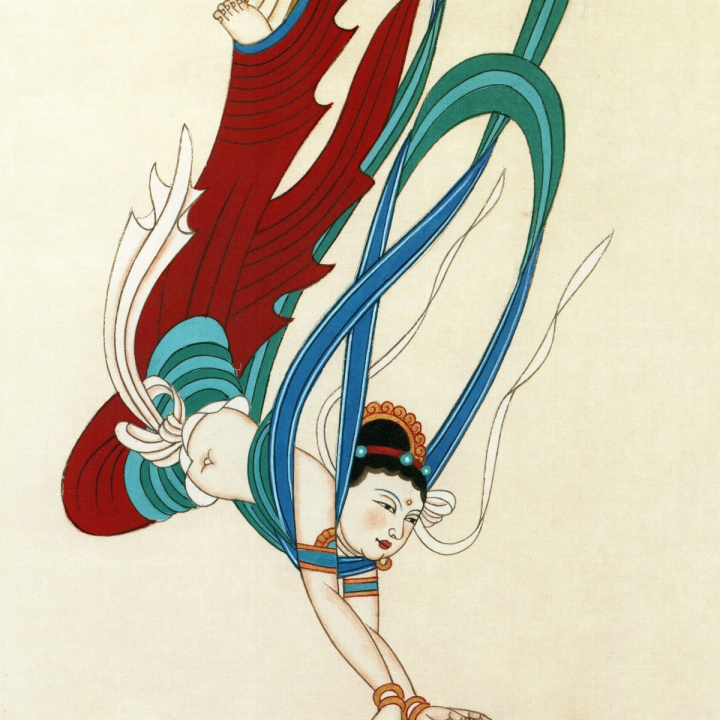

In [12]:
img_url = '../test/images/1.jpg'
mask_url = "../test/masks/1.png"
example_url = "../test/images/1.jpg"

from PIL import Image
init_image = Image.open(img_url).resize((512, 512))
mask_image = Image.open(mask_url).resize((512, 512))
example_image = Image.open(example_url).resize((512, 512))
init_image

In [13]:
image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
image

RuntimeError: The size of tensor a (720) must match the size of tensor b (512) at non-singleton dimension 3